In [1]:
stime = 1000 # simulate the neuron for 1000ms
dt = 0.5 # timestep of 0.5ms
n = 1000 # number of independent neurons
n_syn = 100
# Izekevich constants
inh = (rand(n,1) .< 0.2)
exc = !inh
d = 8.0 * exc + 2.0 * inh
a = 0.02 * exc + 0.1 * inh
c = -65.0
b = 0.2
#Array of timesteps
T = round(Int,(ceil(stime/dt))) 
#Initialize membrane potential variables of Izekevich model
v = zeros(n,T)   # membrane potential for n rows and T timesteps
u = zeros(n,T)
v[:,1] = -70.0
u[:,1] = -14.0

#Incoming synapses
n_in = n_syn # number of input synapses
rate = 2e-3 # poison rate of input spikes (2hz = 2e-3 spikes/ms)
tau_g = 10.0  # decay constant for the PSconductance (filter)
g_in = zeros(n_in,1) # conductances
E_in = zeros(n_in,1) # driving potential; 0 for exctitatory 
w_in = 0.07 * ones(n, n_in) # weights of the synapses for all neurons
w_in[rand(size(w_in)) .> 0.1] = 0.0


#spikes = zeros(T,1)
#gMon = zeros(T,1)

0.0

In [2]:
tic();
Iapp = []
dv = []
fired = []
for t = 1:T-1    
    #generate poison spikes
    if (t*dt > 0.2*stime) && (t*dt < 0.7*stime)
        p = float(rand(n_in,1) .< rate*dt)
    else 
        p = zeros(n_in,1);
    end
 
    g_in = g_in + p   # update condutance for each spike
    Iapp = (w_in * (g_in .* E_in)) - ((w_in * g_in).*v[:,t])
    #Iapp = Iapp[1,1] # Iapp is 2x2 array with one element != float !!
     g_in = (1.0 - (dt/tau_g)) *g_in
    
     dv = (v[:,t].*(0.04*v[:,t] + 5.0)) + 140.0 - u[:,t]
     v[:,t+1] = v[:,t] + (dv + Iapp)*dt;
     du = a.*(b * v[:,t] - u[:,t]);
     u[:,t+1] = u[:,t] + dt*du;
     
    fired = (v[:,t] .>= 35.0)
    v[fired, t] = 35.0
    v[fired, t+1] = c
    u[fired,t+1] = u[fired,t] + d[fired];
    
  
   
end
toc();

elapsed time: 2

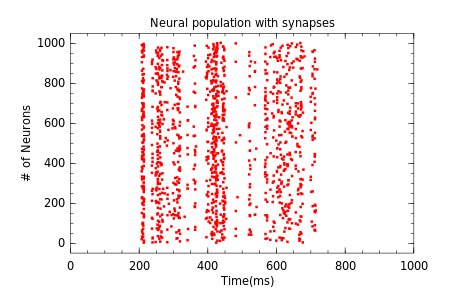

In [9]:
spiks = int(v.==35.0)
(spk,time) = findn(spiks.==1) ;

using Winston
plot(time*dt,spk, "r.")
xlim(0,stime)
title("Neural population with synapses")
xlabel("Time(ms)")
ylabel("# of Neurons")



